In [ ]:
# Heuristics to choose a model: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# https://scikit-learn.org/stable/user_guide.html
# https://scikit-learn.org/stable/modules/classes.html
# https://scikit-learn.org/stable/auto_examples/index.html

In [ ]:
# https://ramsane.github.io/create-dataset/
# Create datasets in 2D of any shape to experiment.

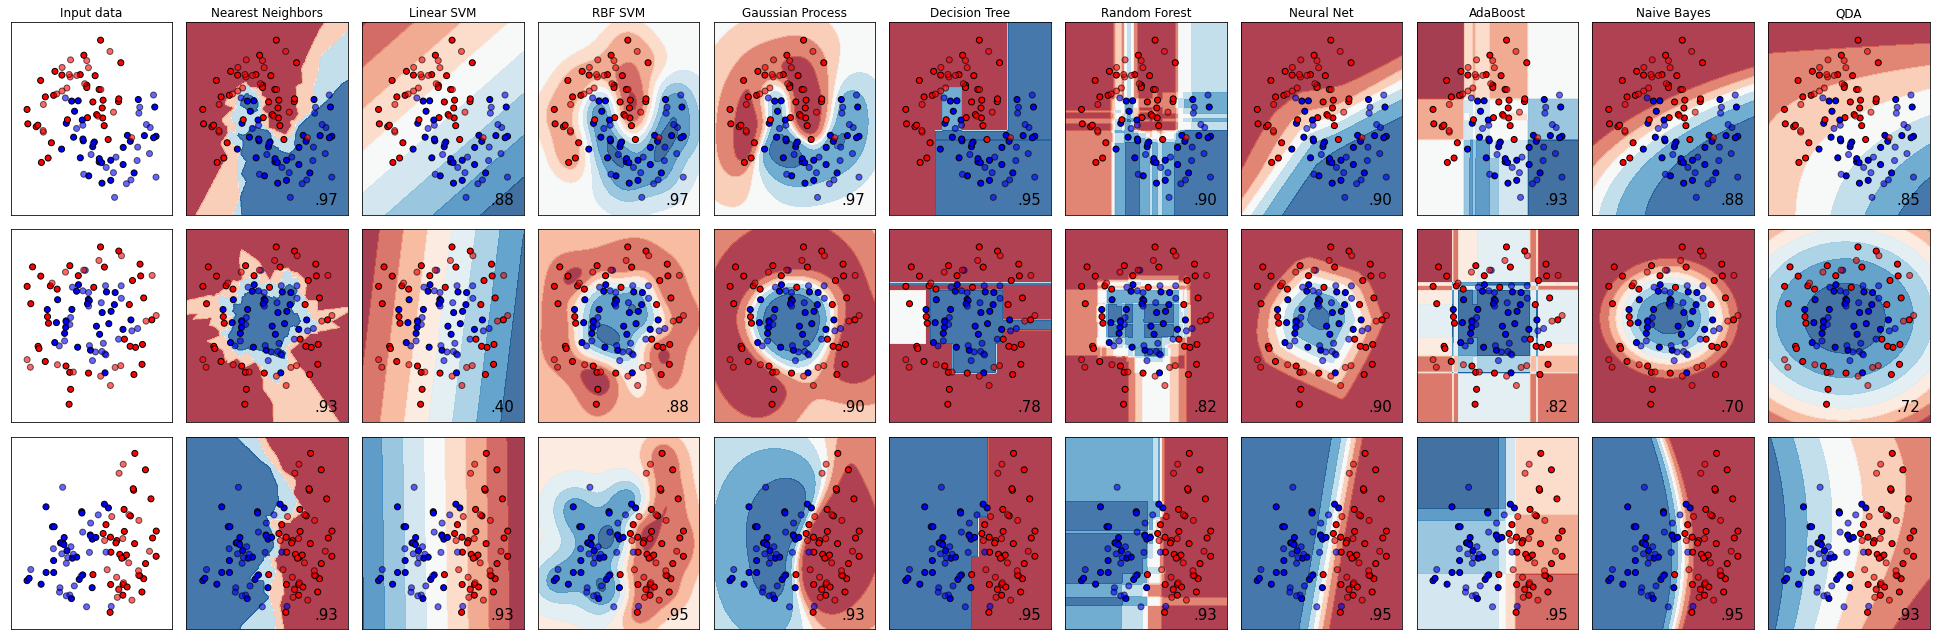

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

Nearest Neighbors
Model Performance of training set
- Accuracy : 0.9500
- F1 Score : 0.9500
- Precision : 0.9333
- Recall : 0.9655
- ROC AUC Score : 0.9505
-----------------------------------
Model Performance of test set
- Accuracy : 0.9750
- F1 Score : 0.9750
- Precision : 0.9545
- Recall : 1.0000
- ROC AUC Score : 0.9737


Linear SVM
Model Performance of training set
- Accuracy : 0.8333
- F1 Score : 0.8330
- Precision : 0.8519
- Recall : 0.7931
- ROC AUC Score : 0.8320
-----------------------------------
Model Performance of test set
- Accuracy : 0.8750
- F1 Score : 0.8748
- Precision : 0.9444
- Recall : 0.8095
- ROC AUC Score : 0.8784


RBF SVM
Model Performance of training set
- Accuracy : 0.9167
- F1 Score : 0.9166
- Precision : 0.9286
- Recall : 0.8966
- ROC AUC Score : 0.9160
-----------------------------------
Model Performance of test set
- Accuracy : 0.9500
- F1 Score : 0.9500
- Precision : 0.9524
- Recall : 0.9524
- ROC AUC Score : 0.9499


Decision Tree
Model Performance o

C:\Users\saras\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AdaBoost
Model Performance of training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- ROC AUC Score : 1.0000
-----------------------------------
Model Performance of test set
- Accuracy : 0.9250
- F1 Score : 0.9250
- Precision : 0.9500
- Recall : 0.9048
- ROC AUC Score : 0.9261


Naive Bayes
Model Performance of training set
- Accuracy : 0.8333
- F1 Score : 0.8333
- Precision : 0.8276
- Recall : 0.8276
- ROC AUC Score : 0.8331
-----------------------------------
Model Performance of test set
- Accuracy : 0.8750
- F1 Score : 0.8751
- Precision : 0.9000
- Recall : 0.8571
- ROC AUC Score : 0.8759




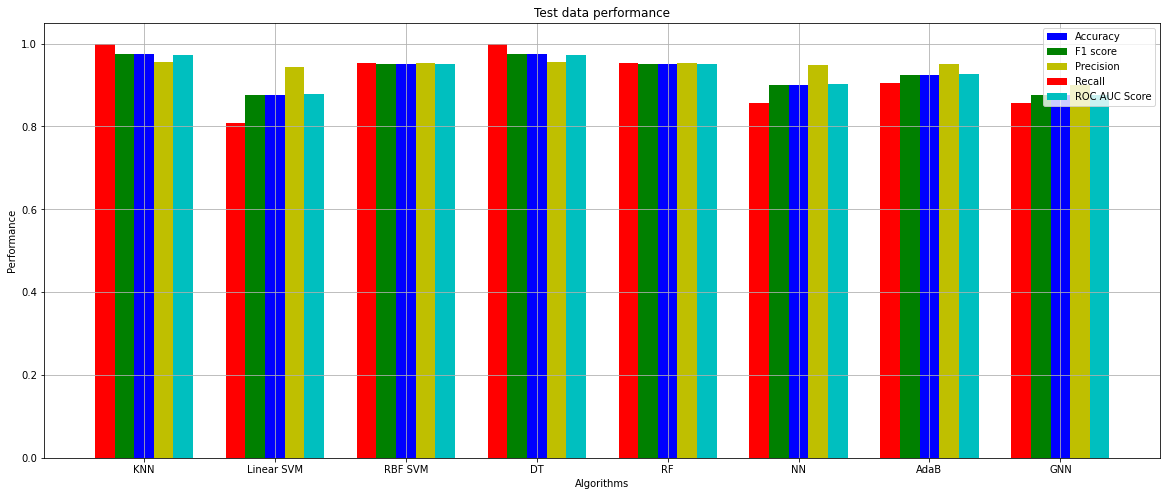

In [28]:
h = .02  # step size in the mesh
metrics = np.zeros((8,5))

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

models = {
    "Nearest Neighbors" : KNeighborsClassifier(), 
    "Linear SVM" : SVC(kernel="linear"), 
    "RBF SVM" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(), 
    "Random Forest" : RandomForestClassifier(), 
    "Neural Net" : MLPClassifier(), 
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB()
}

#print (list(models)

X, y = make_moons(noise=0.3, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    # Make preeictions
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    
    # training performances
    train_accuracy= accuracy_score(y_train,y_train_pred)
    train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    train_precision= precision_score(y_train,y_train_pred)
    train_recall= recall_score(y_train,y_train_pred)
    train_rocauc_score= roc_auc_score(y_train,y_train_pred)
    
    #test data performance
    test_accuracy= accuracy_score(y_test,y_test_pred)
    test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    test_precision= precision_score(y_test,y_test_pred)
    test_recall= recall_score(y_test,y_test_pred)
    test_rocauc_score= roc_auc_score(y_test,y_test_pred)
    
    metrics[i,:]= [test_accuracy,test_f1,test_precision,test_recall,test_rocauc_score]
    
    print (list(models.keys())[i])
    
    print ("Model Performance of training set")
    print ("- Accuracy : {:.4f}".format(train_accuracy))
    print ("- F1 Score : {:.4f}".format(train_f1))
    print ("- Precision : {:.4f}".format(train_precision))
    print ("- Recall : {:.4f}".format(train_recall))
    print ("- ROC AUC Score : {:.4f}".format(train_rocauc_score))
    
    print ('-'*35)
    
    print ("Model Performance of test set")
    print ("- Accuracy : {:.4f}".format(test_accuracy))
    print ("- F1 Score : {:.4f}".format(test_f1))
    print ("- Precision : {:.4f}".format(test_precision))
    print ("- Recall : {:.4f}".format(test_recall))
    print ("- ROC AUC Score : {:.4f}".format(test_rocauc_score))
           
    print('='*35)
    print('\n')
    
a=np.arange(8)
w=0.15
fig,ax=plt.subplots(figsize=(20,8),edgecolor='k')
p1=ax.bar(a,metrics[:,0],w,color='b')
p2=ax.bar(a-w,metrics[:,1],w,color='g')
p3=ax.bar(a+w,metrics[:,2],w,color='y')
p4=ax.bar(a-2*w,metrics[:,3],w,color='r')
p5=ax.bar(a+2*w,metrics[:,4],w,color='c')
ax.set_xticks(a)
ax.set_xticklabels(('KNN','Linear SVM','RBF SVM','DT','RF','NN','AdaB','GNN'))
ax.set_title('Test data performance')
ax.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),('Accuracy','F1 score','Precision','Recall','ROC AUC Score'))
plt.xlabel('Algorithms')
plt.ylabel('Performance')
plt.grid()
plt.show()
                    

### Note : From the performance metrics analysis, we can shortlist the better performing models further for hyperparameter tuning

In [29]:
# Hyper parameter training

rf_params = {"max_depth": [5,8,15,None,10],
             "max_features": [5,7,"auto",8],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,200,500,1000]}

rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [30]:
# Models list for hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [32]:
# Training stage : we are using random search CV 
from sklearn.model_selection import RandomizedSearchCV
model_param ={}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_
    
    for model_name in model_param:
        print(f"------------------Best parameters for {model_name}-----------------")
        print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\saras\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


------------------Best parameters for RF-----------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 8}


In [33]:
# Train the model using the best parameters

models = {
    "Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 'auto', max_depth= 8)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # train model
    
    # make predictions
    y_train_pred= model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # training performances
    train_accuracy= accuracy_score(y_train,y_train_pred)
    train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    train_precision= precision_score(y_train,y_train_pred)
    train_recall= recall_score(y_train,y_train_pred)
    train_rocauc_score= roc_auc_score(y_train,y_train_pred)
    
    #test data performance
    test_accuracy= accuracy_score(y_test,y_test_pred)
    test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    test_precision= precision_score(y_test,y_test_pred)
    test_recall= recall_score(y_test,y_test_pred)
    test_rocauc_score= roc_auc_score(y_test,y_test_pred)
    
    
    print (list(models.keys())[i])
    
    print ("Model Performance of training set")
    print ("- Accuracy : {:.4f}".format(train_accuracy))
    print ("- F1 Score : {:.4f}".format(train_f1))
    print ("- Precision : {:.4f}".format(train_precision))
    print ("- Recall : {:.4f}".format(train_recall))
    print ("- ROC AUC Score : {:.4f}".format(train_rocauc_score))
    
    print ('-'*35)
    
    print ("Model Performance of test set")
    print ("- Accuracy : {:.4f}".format(test_accuracy))
    print ("- F1 Score : {:.4f}".format(test_f1))
    print ("- Precision : {:.4f}".format(test_precision))
    print ("- Recall : {:.4f}".format(test_recall))
    print ("- ROC AUC Score : {:.4f}".format(test_rocauc_score))
           
    print('='*35)
    print('\n')

C:\Users\saras\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest
Model Performance of training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- ROC AUC Score : 1.0000
-----------------------------------
Model Performance of test set
- Accuracy : 0.9500
- F1 Score : 0.9500
- Precision : 0.9524
- Recall : 0.9524
- ROC AUC Score : 0.9499




C:\Users\saras\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


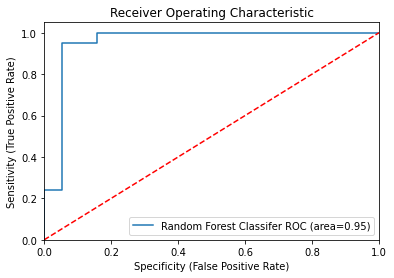

In [34]:
# PLot ROC AUC Curve - Automated

from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list you want to view on the roc plot

auc_models = [
    {
        'label':'Random Forest Classifer',
        'model':RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 'auto', max_depth= 8),
        'auc':0.9499
    },
]

# Create loop through all models

for algo in auc_models:
    model=algo['model']  # select the model
    model.fit(X_train,y_train) # train the model
# Compute FPR and TPR
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
# Compute area under the curve to display in the plot
    plt.plot(fpr,tpr,label='%s ROC (area=%0.2f)' % (algo['label'],algo['auc']))
# Custom settings for the plot
    plt.plot([0,1], [0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig("auc.png")
    plt.show()